# <font color=darkred>Laboratory 9: "A Bullet or A Goat?" or "Things you should know before playing with strangers!"</font>

In [3]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-EH6HD63
desktop-eh6hd63\farha
C:\Users\Farha\Anaconda3\python.exe
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## Title of the notebook:
## Date:
___

# <font color=purple>Simulation, Games, and Probability</font>

## What is Russian roulette?
>Russian roulette (Russian: русская рулетка, russkaya ruletka) is a lethal game of chance in which a player places a single round in a revolver, spins the cylinder, places the muzzle against their head, and pulls the trigger in hopes that the loaded chamber does not align with the primer percussion mechanism and the barrel, causing the weapon to discharge. Russian refers to the supposed country of origin, and roulette to the element of risk-taking and the spinning of the revolver's cylinder, which is reminiscent of a spinning roulette wheel. <br>
- Wikipedia @ https://en.wikipedia.org/wiki/Russian_roulette

<img src="https://emblemsbf.com/img/27699.webp">

>A game of dafts, a game of chance <br>
One where revolver's the one to dance <br>
Rounds and rounds, it goes and spins <br>
Makes you regret all those sins <br> \
A game of fools, one of lethality  <br>
With a one to six probability <br>
There were two guys and a gun <br>
With six chambers but only one... <br> \
CLICK, one pushed the gun <br>
CLICK, one missed the fun <br>
CLICK, "that awful sound" ... <br>
BANG!, one had his brains all around! <br>

___
### Example: Simulate a game of Russian Roulette:
- For 2 rounds
- For 5 rounds
- For 10 rounds

In [4]:
import numpy as np                     #import numpy
revolver = np.array([1,0,0,0,0,0])     #create a numpy array with 1 bullet and 5 empty chambers
print(np.random.choice(revolver,2))              #randomly select a value from revolver - simulation

[0 0]


In [5]:
print(np.random.choice(revolver,5))

[0 0 0 0 0]


In [6]:
print(np.random.choice(revolver,10))

[0 0 0 0 1 0 0 0 0 1]


![](https://blog.uvm.edu/aivakhiv/files/2020/06/d4cawex-fd18072b-6140-48d9-93d7-0fa9435abf0e.png)

___
### Example: Simulate the results of throwing a D6 (regular dice) for 10 times. 

In [7]:
import numpy as np                     #import numpy
dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
np.random.choice(dice,10)              #randomly selecting a value from dice for 10 times- simulation

array([6, 2, 3, 2, 6, 3, 4, 1, 6, 2])

___
### Example: Assume the following rules:

- If the dice shows 1 or 2 spots, my net gain is -1 dollar.

- If the dice shows 3 or 4 spots, my net gain is 0 dollars.

- If the dice shows 5 or 6 spots, my net gain is 1 dollar.

__Define a function to simulate a game with the above rules, assuming a D6, and compute the net gain of the player over any given number of rolls. <br>
Compute the net gain for 5, 50, and 500 rolls__

In [8]:
def D6game(nrolls):
    import numpy as np                     #import numpy
    dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
    rolls = np.random.choice(dice,nrolls)  #randomly selecting a value from dice for nrolls times- simulation
    gainlist =[]                           #create an empty list for gains|losses
    for i in np.arange(len(rolls)):        #Apply the rules 
        if rolls[i]<=2:
            gainlist.append(-1)
        elif rolls[i]<=4:
            gainlist.append(0)
        elif rolls[i]<=6:
            gainlist.append(+1)
    return (np.sum(gainlist))              #sum up all gains|losses
#   return (gainlist,"The net gain is equal to:",np.sum(gainlist))


In [9]:
D6game(5)

3

In [10]:
D6game(50)

14

In [11]:
D6game(500)

-16

![](https://www.gannett-cdn.com/media/2017/09/30/USATODAY/USATODAY/636423937425139027-XXX-D4-MONTY-HALL-27-TV.jpg?width=2560)

### Let's Make A Deal Game Show and Monty Hall Problem 
__The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show Let's Make a Deal and named after its original host, Monty Hall. The problem was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in 1975 (Selvin 1975a), (Selvin 1975b).__

>"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?"

__*From Wikipedia: https://en.wikipedia.org/wiki/Monty_Hall_problem*__

![](https://thumbs.gfycat.com/ClearcutFragrantArcherfish-size_restricted.gif)

![](http://www.bcmath.ca/m10h/The%20Monty%20Hall%20Problem%20(Web)/data/img1.png)

![](https://webstockreview.net/images/clipart-door-orange-door-3.png)

![](https://brilliant-staff-media.s3-us-west-2.amazonaws.com/tiffany-wang/UcEdvPuGYw.png)

___
### Example: Simulate Monty Hall Game for 1000 times. Use a barplot and discuss whether players are better off sticking to their initial choice, or switching doors? 

In [12]:
def othergoat(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"

In [13]:
Doors = np.array(["Car","Goat 1","Goat 2"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2"])          #Define a list for goats!

def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "the remaining"]
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":
        return [userguess, "Goat 2","Car"]
    if userguess == "Goat 2":
        return [userguess, "Goat 1","Car"]
    if userguess == "Car":
        revealed = np.random.choice(goats)
        return [userguess, revealed,othergoat(revealed)]

In [14]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])

['Car', 'Goat 2', 'Goat 1']
Car
Goat 2
Goat 1


In [15]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining
for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list


In [17]:
import pandas as pd
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining':c3})
gamedf

Guess Revealed Remaining
0    Goat 2   Goat 1       Car
1       Car   Goat 2    Goat 1
2    Goat 1   Goat 2       Car
3    Goat 2   Goat 1       Car
4    Goat 1   Goat 2       Car
..      ...      ...       ...
995  Goat 1   Goat 2       Car
996  Goat 2   Goat 1       Car
997     Car   Goat 2    Goat 1
998     Car   Goat 2    Goat 1
999  Goat 1   Goat 2       Car

[1000 rows x 3 columns]

In [18]:
# Get the count of each item in the first and 3rd column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining == 'Goat 2'].shape[0]

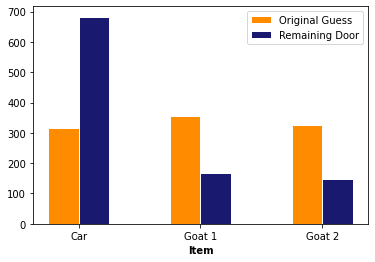

In [20]:
# Let's plot a grouped barplot
import matplotlib.pyplot as plt  

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2]
bars2 = [remaining_car,remaining_g1,remaining_g2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__According to the plot, it is statitically beneficial for the players to switch doors because the initial chance for being correct is only 1/3__</font>

![](http://imgs.xkcd.com/comics/monty_hall.png)

___
### Example: What if there were 4 doors and 3 goats?

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

Doors = np.array(["Car","Goat 1","Goat 2","Goat 3"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2","Goat 3"])          #Define a list for goats!



In [22]:
def othergoat12(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"
    
def othergoat23(x):         #Define a function to return "the other goat"!
    if x == "Goat 2":
        return "Goat 3"
    elif x == "Goat 3":
        return "Goat 2"
    
def othergoat13(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 3"
    elif x == "Goat 3":
        return "Goat 1"
#####################################    
def othergoat123(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return np.random.choice(["Goat 2","Goat 3"])
    elif x == "Goat 2":
        return np.random.choice(["Goat 1","Goat 3"])
    elif x == "Goat 3":
        return np.random.choice(["Goat 1","Goat 2"])

In [23]:
def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "unrevealed1", "unrevealed2"]
    goats = np.array(["Goat 1" , "Goat 2","Goat 3"])
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":                          #If the user chooses Goat 1
        revealed = np.random.choice(goats[np.arange(len(goats))!=0])
        unrevealed1 = othergoat23(revealed)
        unrevealed2 = "Car"
        return [userguess, revealed,unrevealed1,unrevealed2]
    if userguess == "Goat 2":                          #If the user chooses Goat 2
        revealed = np.random.choice(goats[np.arange(len(goats))!=1])
        unrevealed1 = othergoat13(revealed)
        unrevealed2 = "Car"
        return [userguess, revealed,unrevealed1,unrevealed2]
    if userguess == "Goat 3":                          #If the user chooses Goat 3
        revealed = np.random.choice(goats[np.arange(len(goats))!=2])
        unrevealed1 = othergoat12(revealed)
        unrevealed2 = "Car"
        return [userguess, revealed,unrevealed1,unrevealed2]
    if userguess == "Car":                          #If the user chooses Car
        revealed = np.random.choice(goats)
        newgoat = goats[goats != revealed]
        unrevealed1 = newgoat[0]
        unrevealed2 = newgoat[1]
        return [userguess, revealed,unrevealed1,unrevealed2]

In [24]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])
    print(a[3])

['Goat 3', 'Goat 2', 'Goat 1', 'Car']
Goat 3
Goat 2
Goat 1
Car


In [25]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining1
c4 = []         #Create an empty list for the remaining2

for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list1
    c4.append(game[3])             #In each round, add the fourth element to the remaining list2


In [26]:
import pandas as pd
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining1':c3,
                       'Remaining2':c4})
gamedf

Guess Revealed Remaining1 Remaining2
0    Goat 1   Goat 3     Goat 2        Car
1    Goat 1   Goat 3     Goat 2        Car
2    Goat 3   Goat 2     Goat 1        Car
3    Goat 2   Goat 1     Goat 3        Car
4    Goat 1   Goat 3     Goat 2        Car
..      ...      ...        ...        ...
995     Car   Goat 3     Goat 1     Goat 2
996     Car   Goat 1     Goat 2     Goat 3
997  Goat 2   Goat 3     Goat 1        Car
998     Car   Goat 3     Goat 1     Goat 2
999  Goat 3   Goat 1     Goat 2        Car

[1000 rows x 4 columns]

In [27]:
# Get the count of each item in the first and (3rd+4th) column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining1 == 'Car'].shape[0] + gamedf[gamedf.Remaining2 == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining1 == 'Goat 1'].shape[0] + gamedf[gamedf.Remaining2 == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining1 == 'Goat 2'].shape[0] + gamedf[gamedf.Remaining2 == 'Goat 2'].shape[0]

original_g3 =gamedf[gamedf.Guess == 'Goat 3'].shape[0]
remaining_g3 =gamedf[gamedf.Remaining1 == 'Goat 3'].shape[0] + gamedf[gamedf.Remaining2 == 'Goat 3'].shape[0]

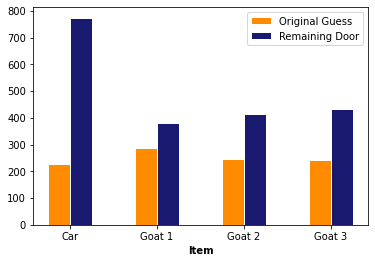

In [28]:
# Let's plot a grouped barplot
import matplotlib.pyplot as plt  

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2,original_g3]
bars2 = [remaining_car,remaining_g1,remaining_g2,remaining_g3]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2','Goat 3'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__Comparison of the plots show that as the number of doors (and goats) increases, it makes even more sense to switch!__</font>

___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>


*Here are some great reads on this topic:* 
- __"Simulate the Monty Hall Problem Using Python"__ by __randerson112358__ available at *https://medium.com/swlh/simulate-the-monty-hall-problem-using-python-7b76b943640e* <br>
- __"The Monty Hall problem"__ available at *https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/the-monty-hall-problem/*<br>

*Here are some great videos on these topics:* 
- __"Monty Hall Problem - Numberphile"__ by __Numberphile__ available at *https://www.youtube.com/watch?v=4Lb-6rxZxx0* <br>
- __"The Monty Hall Problem"__ by __D!NG__ available at *https://www.youtube.com/watch?v=TVq2ivVpZgQ* <br>
- __"21 - Monty Hall - PROPENSITY BASED THEORETICAL MODEL PROBABILITY - MATHEMATICS in the MOVIES"__ by __Motivating Mathematical Education and STEM__ available at *https://www.youtube.com/watch?v=iBdjqtR2iK4* <br>
- __"The Monty Hall Problem"__ by __niansenx__ available at *https://www.youtube.com/watch?v=mhlc7peGlGg* <br>
- __"The Monty Hall Problem - Explained"__ by __AsapSCIENCE__ available at *https://www.youtube.com/watch?v=9vRUxbzJZ9Y* <br>

___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: Three Prisoners problem  <br>

### Three prisoners, A, B, and C, are in separate cells and sentenced to death. The governor has selected one of them at random to be pardoned. The warden knows which one is pardoned, but is not allowed to tell. Prisoner A begs the warden to let him know the identity of one of the two who are going to be executed. "If B is to be pardoned, give me C's name. If C is to be pardoned, give me B's name. And if I'm to be pardoned, secretly flip a coin to decide whether to name B or C."

### The warden tells A that B is to be executed. Prisoner A is pleased because he believes that his probability of surviving has gone up from 1/3 to 1/2, as it is now between him and C. Prisoner A secretly tells C the news, who reasons that A's chance of being pardoned is unchanged at 1/3, but he is pleased because his own chance has gone up to 2/3. Which prisoner is correct?

### Answer the question and explain your answer.  

<br>
<br>

#### _The Three Prisoners problem appeared in Martin Gardner's "Mathematical Games" column in Scientific American in 1959._
#### _Make sure to cite any resources that you may use._ 

![](https://cdn.quotes.pub/660x400/thats-too-bad-mr-hall-said-opening-door-579647.jpg)